In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_clean = pd.read_csv("/content/water-quality-FINAL-cleaned.csv")

In [21]:
df_clean.head()

,pH,DO,Conductivity,Temperature,Total_N,Orthophosphate,Year,Month,Season,Season_numerical
0,0.903448,-0.121627,0.004939,0.926817,-0.911018,0.029471,2015,8,Summer,3
1,0.783984,-0.858708,-0.052245,0.753946,-0.363770,0.046118,2015,8,Summer,3
2,1.103978,0.020234,-0.106052,1.203410,-0.363770,0.025256,2015,8,Summer,3
3,0.254928,-0.518440,-0.135834,0.995965,-0.034853,0.056022,2015,8,Summer,3
4,0.476790,0.215664,-0.035970,0.719372,-0.596279,0.039585,2015,8,Summer,3


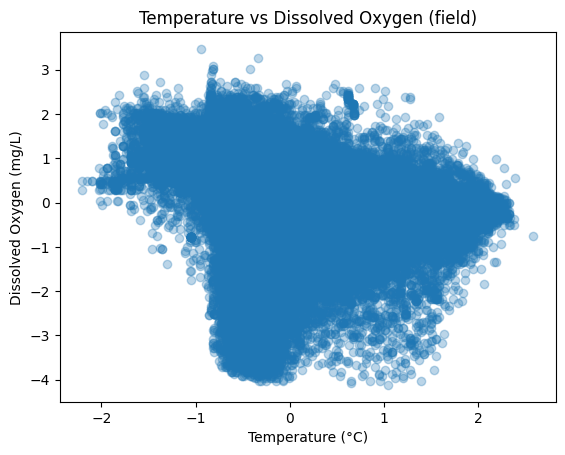

In [22]:
plt.scatter(df_clean["Temperature"], df_clean["DO"], alpha=0.3)
plt.title("Temperature vs Dissolved Oxygen (field)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Dissolved Oxygen (mg/L)")
plt.show()

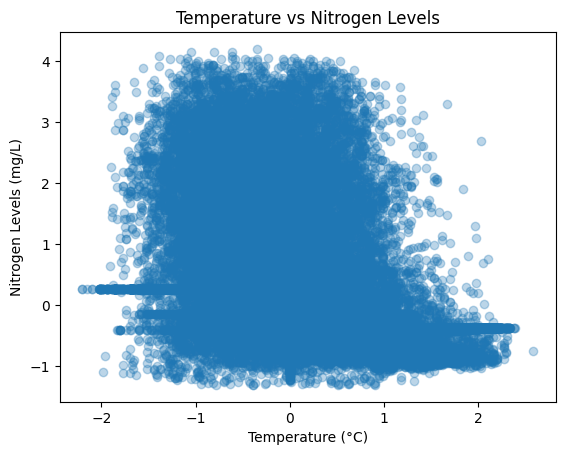

In [23]:
plt.scatter(df_clean["Temperature"], df_clean["Total_N"], alpha=0.3)
plt.title("Temperature vs Nitrogen Levels")
plt.xlabel("Temperature (°C)")
plt.ylabel("Nitrogen Levels (mg/L)")
plt.show()

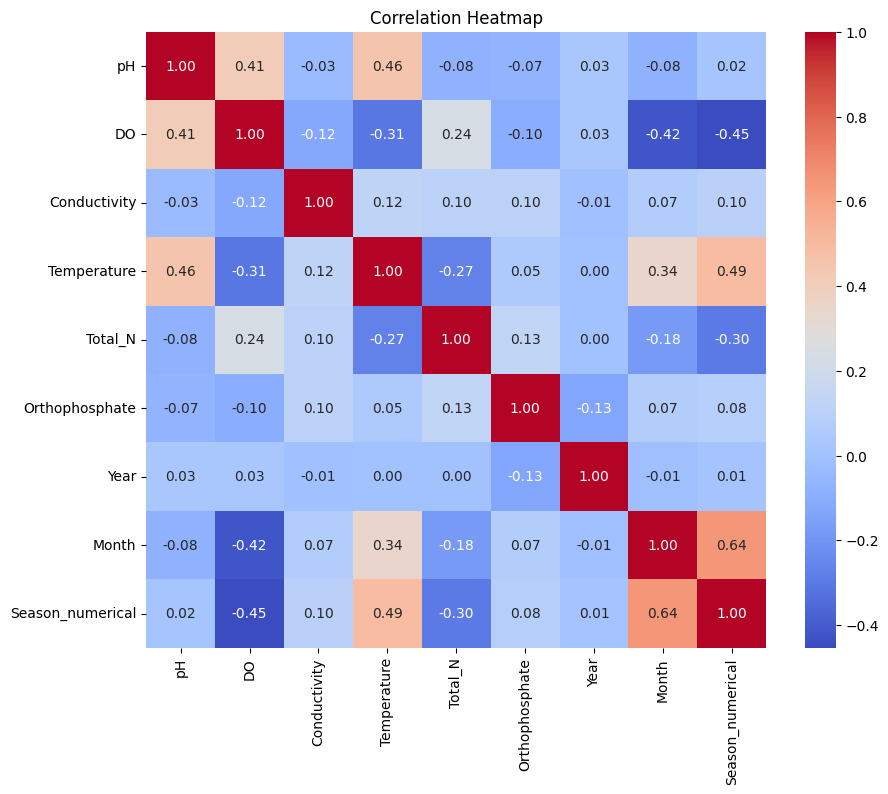

In [24]:
# Select columns for correlation
cols_for_corr = [
    'pH', 'DO', 'Conductivity', 'Temperature',
    'Total_N', 'Orthophosphate',
    'Year', 'Month', 'Season_numerical'
]

plt.figure(figsize=(10,8))
sns.heatmap(df_clean[cols_for_corr].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

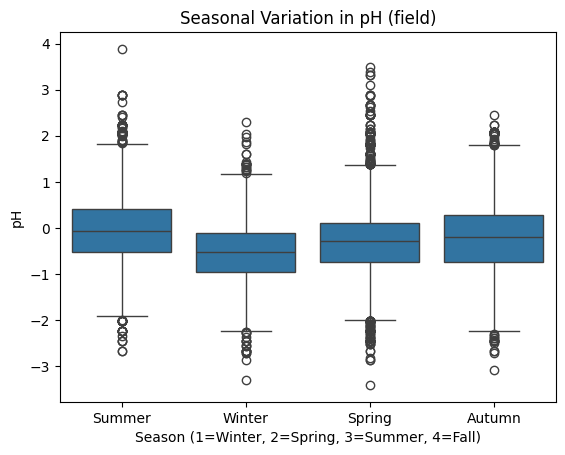

In [7]:
sns.boxplot(x="Season", y="pH", data=df_clean)
plt.title("Seasonal Variation in pH (field)")
plt.xlabel("Season (1=Winter, 2=Spring, 3=Summer, 4=Fall)")
plt.ylabel("pH")
plt.show()

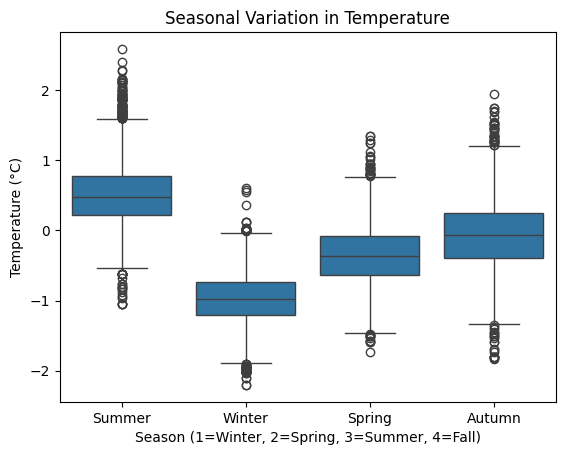

In [8]:
sns.boxplot(x="Season", y="Temperature", data=df_clean)
plt.title("Seasonal Variation in Temperature")
plt.xlabel("Season (1=Winter, 2=Spring, 3=Summer, 4=Fall)")
plt.ylabel("Temperature (°C)")
plt.show()

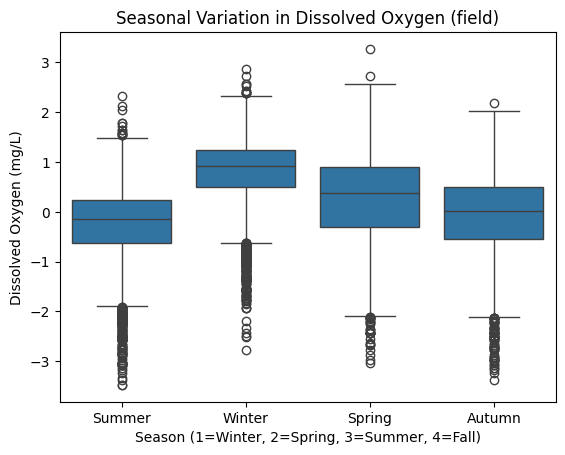

In [9]:
sns.boxplot(x="Season", y="DO", data=df_clean)
plt.title("Seasonal Variation in Dissolved Oxygen (field)")
plt.xlabel("Season (1=Winter, 2=Spring, 3=Summer, 4=Fall)")
plt.ylabel("Dissolved Oxygen (mg/L)")
plt.show()

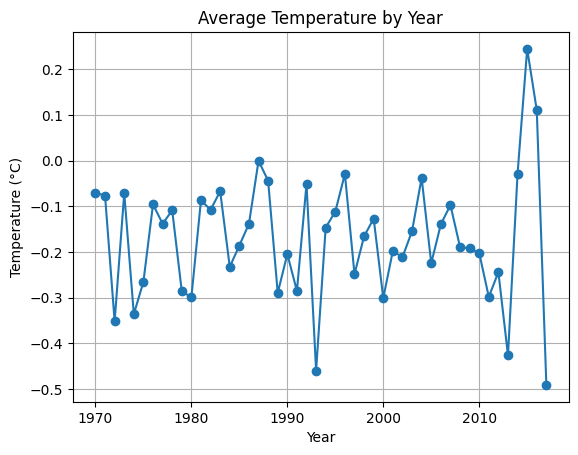

In [10]:
yearly_temp = df_clean.groupby("Year")["Temperature"].mean()

plt.plot(yearly_temp.index, yearly_temp.values, marker="o")
plt.title("Average Temperature by Year")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

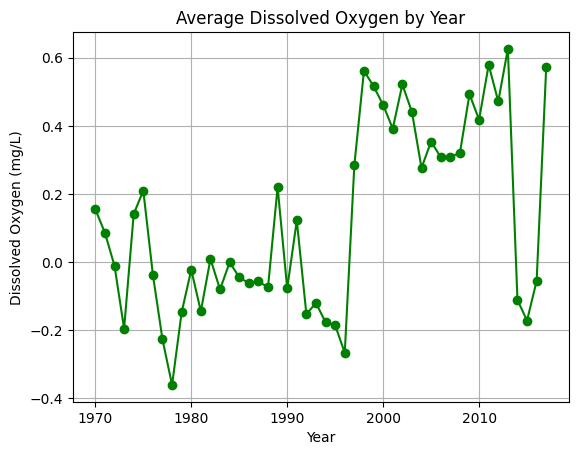

In [11]:
yearly_do = df_clean.groupby("Year")["DO"].mean()

plt.plot(yearly_do.index, yearly_do.values, marker="o", color="green")
plt.title("Average Dissolved Oxygen by Year")
plt.xlabel("Year")
plt.ylabel("Dissolved Oxygen (mg/L)")
plt.grid(True)
plt.show()


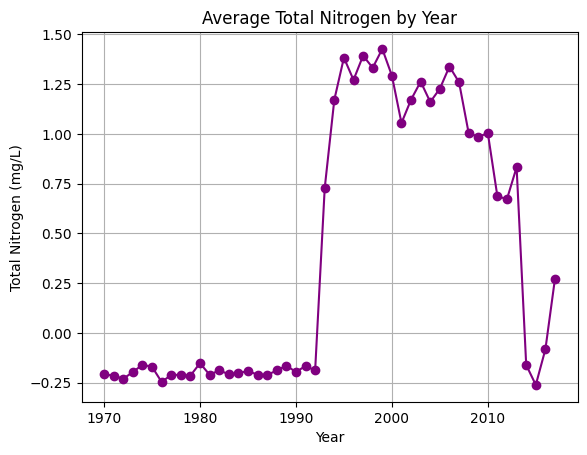

In [12]:
yearly_do = df_clean.groupby("Year")["Total_N"].mean()

plt.plot(yearly_do.index, yearly_do.values, marker="o", color="purple")
plt.title("Average Total Nitrogen by Year")
plt.xlabel("Year")
plt.ylabel("Total Nitrogen (mg/L)")
plt.grid(True)
plt.show()


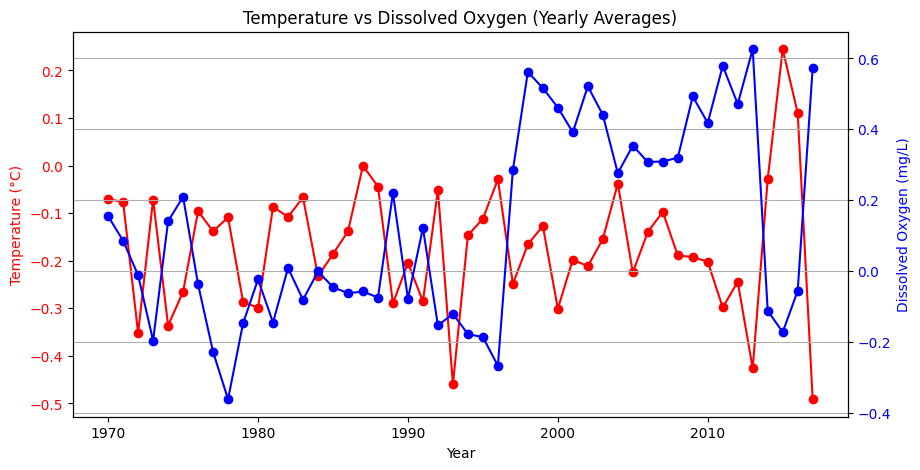

In [13]:
yearly = df_clean.groupby("Year")[["Temperature", "DO"]].mean()

fig, ax1 = plt.subplots(figsize=(10,5))

# Temperature (left axis)
ax1.plot(yearly.index, yearly["Temperature"], color="red", marker="o", label="Temperature (°C)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Temperature (°C)", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Dissolved Oxygen (right axis)
ax2 = ax1.twinx()
ax2.plot(yearly.index, yearly["DO"], color="blue", marker="o", label="Dissolved Oxygen (mg/L)")
ax2.set_ylabel("Dissolved Oxygen (mg/L)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("Temperature vs Dissolved Oxygen (Yearly Averages)")
plt.grid(True)
plt.show()

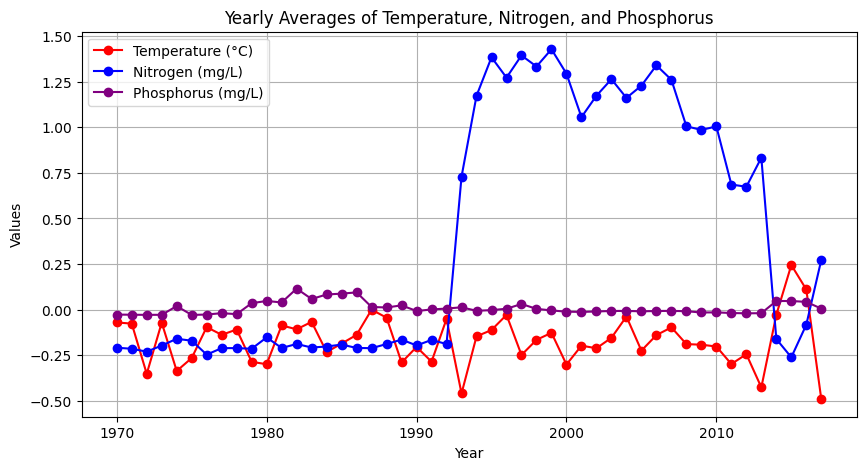

In [14]:
yearly = df_clean.groupby("Year")[["Temperature", "Total_N", "Orthophosphate"]].mean()

plt.figure(figsize=(10,5))
plt.plot(yearly.index, yearly["Temperature"], marker="o", label="Temperature (°C)", color="red")
plt.plot(yearly.index, yearly["Total_N"], marker="o", label="Nitrogen (mg/L)", color="blue")
plt.plot(yearly.index, yearly["Orthophosphate"], marker="o", label="Phosphorus (mg/L)", color="purple")

plt.title("Yearly Averages of Temperature, Nitrogen, and Phosphorus")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

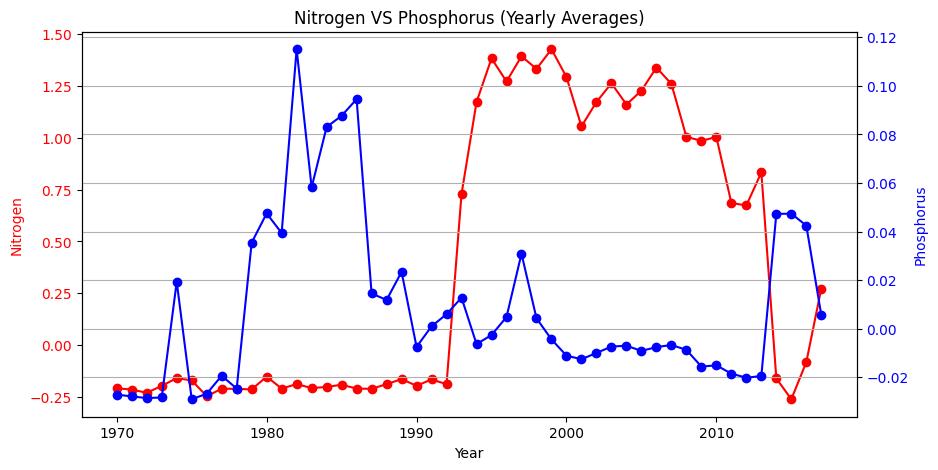

In [15]:
yearly = df_clean.groupby("Year")[["Total_N", "Orthophosphate"]].mean()

fig, ax1 = plt.subplots(figsize=(10,5))

# Nitrogen (left axis)
ax1.plot(yearly.index, yearly["Total_N"], color="red", marker="o", label="Nitrogen")
ax1.set_xlabel("Year")
ax1.set_ylabel("Nitrogen", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Phosphorus (right axis)
ax2 = ax1.twinx()
ax2.plot(yearly.index, yearly["Orthophosphate"], color="blue", marker="o", label="Phosphorus")
ax2.set_ylabel("Phosphorus", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("Nitrogen VS Phosphorus (Yearly Averages)")
plt.grid(True)
plt.show()

In [25]:
#MLR analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [26]:
target = 'Temperature'
predictors = [
    'pH', 'DO', 'Conductivity',
    'Total_N', 'Orthophosphate']


In [27]:
#OLS Regression using only chemical indicators, excluding year, month and seasons
X = sm.add_constant(df_clean[predictors])
y = df_clean[target]
mlr = sm.OLS(y, X).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                 3.004e+04
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:12:44   Log-Likelihood:            -1.0149e+05
No. Observations:              138981   AIC:                         2.030e+05
Df Residuals:                  138975   BIC:                         2.031e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0340      0.001     23.

In [28]:
df_clean.head()

,pH,DO,Conductivity,Temperature,Total_N,Orthophosphate,Year,Month,Season,Season_numerical
0,0.903448,-0.121627,0.004939,0.926817,-0.911018,0.029471,2015,8,Summer,3
1,0.783984,-0.858708,-0.052245,0.753946,-0.363770,0.046118,2015,8,Summer,3
2,1.103978,0.020234,-0.106052,1.203410,-0.363770,0.025256,2015,8,Summer,3
3,0.254928,-0.518440,-0.135834,0.995965,-0.034853,0.056022,2015,8,Summer,3
4,0.476790,0.215664,-0.035970,0.719372,-0.596279,0.039585,2015,8,Summer,3


In [31]:
target = 'Temperature'
predictors = [
    'pH', 'DO', 'Conductivity', 'Total_N', 'Orthophosphate',
    'Year', 'Month', 'Season_numerical']

In [32]:
#OLS Regression using all predictors, including year, month and seasons
X = sm.add_constant(df_clean[predictors])
y = df_clean[target]
mlr = sm.OLS(y, X).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                 2.334e+04
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:13:18   Log-Likelihood:                -93235.
No. Observations:              138981   AIC:                         1.865e+05
Df Residuals:                  138972   BIC:                         1.866e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1585      0.239  

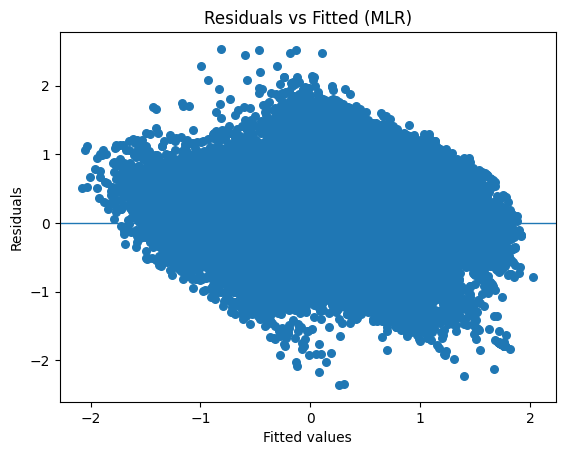

In [34]:
#residuals
fitted = mlr.fittedvalues
resid = mlr.resid

plt.figure()
plt.scatter(fitted, resid, s=30)
plt.axhline(0, linewidth=1)
plt.xlabel("Fitted values"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (MLR)"); plt.show()

In [37]:
#VIF
# we expect year, month and seasons to be highly correlated with temperature so
# they understandably have high VIF values
X_vif = df_clean[predictors].values
vif_vals = [variance_inflation_factor(X_vif, i) for i in range(X_vif.shape[1])]
pd.DataFrame({"predictor": predictors, "VIF": np.round(vif_vals, 2)})

,predictor,VIF
0,pH,1.32
1,DO,1.75
2,Conductivity,1.13
3,Total_N,1.21
4,Orthophosphate,1.16
5,Year,11.52
6,Month,9.98
7,Season_numerical,15.38
